In [4]:
import cv2 # import python openCV
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt 

%matplotlib inline

image = misc.ascent() # grab an image from misc.ascent()

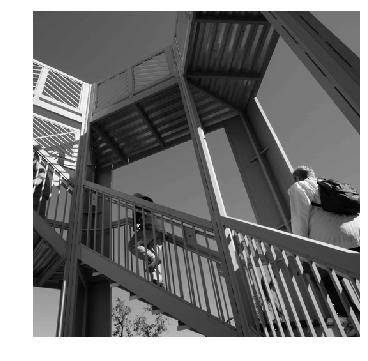

In [71]:
plt.figure(figsize = (12, 6))
plt.axis('off')
plt.gray()
plt.grid(False)
plt.imshow(image)

In [19]:
image_transformed = np.copy(image) # coppy the original image (Array)
size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]

print("size_x: ", size_x)
print("size_y: ", size_y)

size_x:  512
size_y:  512


## Create A Filter (3*3) Array:

In [112]:
# Remember that all the digits in the filter must add up to either "0", or "1"
# in other case, you have to Normalize the values by setting some weight value
filter1 = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
weight = 1

Now let's creat a __Convolution__. We'll iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbours of the current pixel by the value defined in the __filter__

In [30]:
image.shape

(512, 512)

In [136]:
filter1 = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]

In [137]:
for x in range(1, size_x-1):
    for y in range(1, size_y-1):
        convolution = 0.0
        convolution = convolution + (image[x-1, y-1] * filter1[0][0])
        convolution = convolution + (image[x, y-1] * filter1[1][0])
        convolution = convolution + (image[x+1, y-1] * filter1[2][0])
        convolution = convolution + (image[x-1, y] * filter1[0][1])
        convolution = convolution + (image[x, y] * filter1[1][1])
        convolution = convolution + (image[x+1, y] * filter1[2][1])
        convolution = convolution + (image[x-1, y+1] * filter1[0][2])
        convolution = convolution + (image[x, y+1] * filter1[1][1])
        convolution = convolution + (image[x+1, y+1] * filter1[2][1])
        convolution = convolution * weight
        if (convolution < 0):
            convolution = 0
        if (convolution > 255):
            convolution = 255
        
        image_transformed[x, y] = convolution
        
print(convolution)

55.0


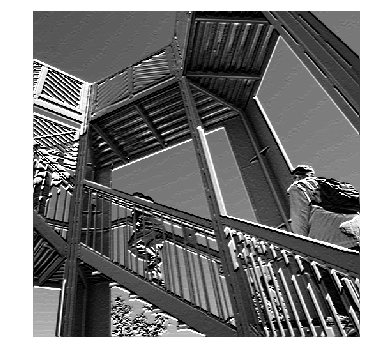

In [138]:
# Now let's plot the image and see the effects of our Convolution!
plt.figure(figsize = (12, 6))
plt.gray()
plt.grid(False)
plt.axis("off")
plt.imshow(image_transformed)

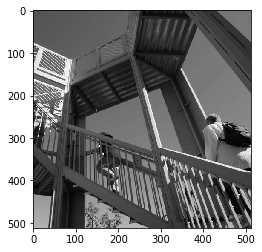

In [119]:
plt.imshow(image)